In [1]:
import numpy as np
import pandas as pd
from scipy.stats import expon
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'

# Info from BAM mappings.
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']

In [2]:
# Average = 3 reads / 30 bases
# 5000 people
poisson.ppf(np.exp(np.log(.95)/5000), mu=1/10)
#poisson.cdf(mu=20,k=30)**50
# Using k-mers of 106, we have a 99.5 of the each kmer being correctly found (twice) in all samples

3.0

In [3]:
kmer_thresh = 110
avg_number_of_kmer = (150-kmer_thresh)/avg_dist_between_starts
poisson.sf(mu=, k=1)

SyntaxError: invalid syntax (<ipython-input-3-9a0dac34cb5e>, line 3)

In [12]:
import numpy as np
import pandas as pd
#from scipy.stats import expon
#from scipy.stats import poisson
#import seaborn as sns
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'

# Info from BAM mappings.
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']


PARENT_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
ihart_flagstat_file = PARENT_DIR + 'data/ihart_flagstat.csv'
flagstat = pd.read_csv(ihart_flagstat_file, index_col=0)
flagstat = flagstat.loc[set(flagstat.index).intersection(bam_mappings.index)]
bam_mappings = bam_mappings.loc[flagstat.index]

kmer_length = 100
total_mapped_reads = flagstat.ProperPair*((flagstat.Total_Reads-flagstat.Supplementary-flagstat.Duplicates)/flagstat.Total_Reads)
avg_coverage = total_mapped_reads*150/(6.27e9*(bam_mappings.sex_numeric.astype(float)==1.0) + 6.37e9*(bam_mappings.sex_numeric.astype(float)==2.0))
avg_n_100mers = (150-kmer_length)/(150/avg_coverage)
kmer_depth_dict = {k:avg_n_100mers[k] for k in avg_n_100mers.keys()}


114


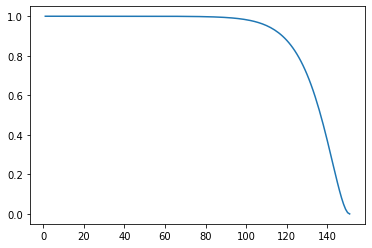

In [169]:
from kneed import KneeLocator
kn = KneeLocator(list(range(1,152)), probs, curve='concave', direction='decreasing')
plt.plot(list(range(1,152)), probs)
print(kn.knee)

In [160]:
%%bash
pip3 install kneed

bash: /home/users/briannac/.local/bin/pip3: /share/sw/free/python/3.4.3/bin/python3.4: bad interpreter: No such file or directory


CalledProcessError: Command 'b'pip3 install kneed\n'' returned non-zero exit status 126.

In [180]:
correct_rate_per_base = (1-0.0024)

In [293]:
correct_rate_per_base**100

0.9047921471137089

In [284]:
prob_d2 = [-1] + list(np.diff(np.diff(probs))) + [1]

0.9974086890690924
0.9819759000250625


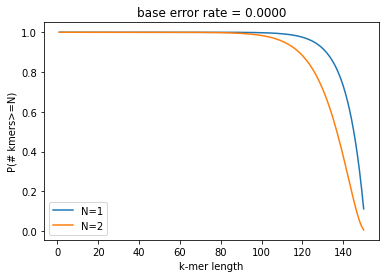

0.9972488593589659
0.9810288503308241


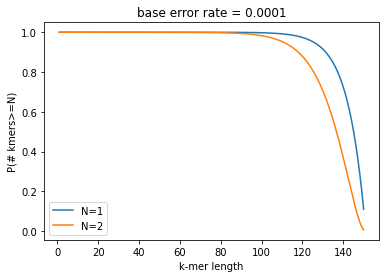

0.9965252418257379
0.9768503604847482


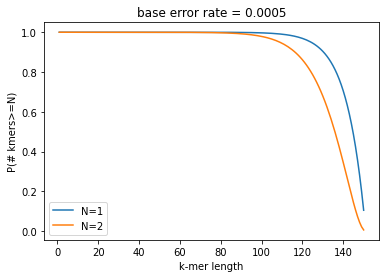

0.9954068248492476
0.9706809190623565


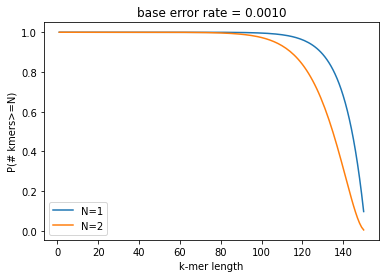

In [296]:
k = 100
L = 3.09e9*2
total_mapped_reads = flagstat.ProperPair*((flagstat.Total_Reads-flagstat.Supplementary-flagstat.Duplicates)/flagstat.Total_Reads)

for error_rate in [0, .0001, .0005, .001]:
    read_starts_per_loci = np.mean(total_mapped_reads/L)
    correct_rate_per_base = (1-error_rate)
    k_range = np.array(list(range(1,151)))
    probs = np.array([(poisson.sf(mu=read_starts_per_loci*(151-k)*(correct_rate_per_base**k), k=0)) for k in k_range])
    prob_d2 = np.array([-1] + list(np.diff(np.diff(probs))) + [1])
    kn = KneeLocator(k_range[prob_d2<0], probs[prob_d2<0], curve='concave', direction='decreasing')
    print(probs[100])
    plt.plot(k_range,probs, label='N=1') #probs[1:]-probs[:-1])
    probs = np.array([(poisson.sf(mu=read_starts_per_loci*(151-k)*(correct_rate_per_base**k), k=1)) for k in k_range])
    prob_d2 = np.array([-1] + list(np.diff(np.diff(probs))) + [1])
    kn = KneeLocator(k_range, probs, curve='concave', direction='decreasing')
    print(probs[100])
    plt.plot(k_range,probs, label='N=2') #probs[1:]-probs[:-1])
    plt.legend()
    plt.title('base error rate = %.4f' % error_rate)
    plt.xlabel('k-mer length')
    plt.ylabel('P(# kmers>=N)')
    plt.savefig('/home/groups/dpwall/briannac/alt_haplotypes/results/figures/supp_and_other/kmer_length_determination_error%.4f.svg' % error_rate, transparent=True)
    plt.savefig('/home/groups/dpwall/briannac/alt_haplotypes/results/figures/supp_and_other/kmer_length_determination_error%.4f.pdf' % error_rate, transparent=True)
    plt.show()


In [228]:
correct_rate_per_base
#read_starts_per_loci*(151-k)*(correct_rate_per_base**k)

0.9976

In [223]:
k=120
read_starts_per_loci*(151-k)*(correct_rate_per_base**k)

2.767511528283063

In [219]:
k = 100
read_starts_per_loci*(151-k)*(correct_rate_per_base**k)

6.074703208000154e-100

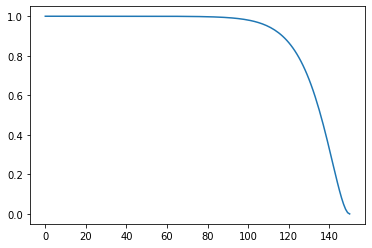

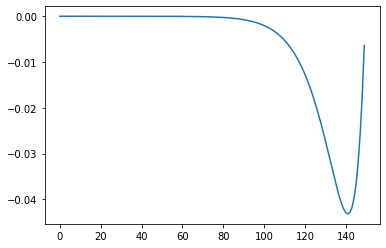

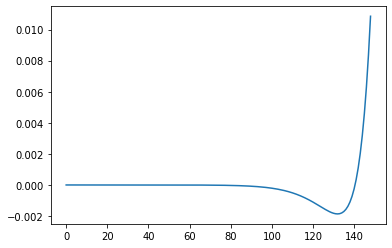

In [148]:
probs = np.array([(poisson.sf(mu=read_starts_per_loci*(151-k), k=1)) for k in range(1,152)])
plt.plot(probs)
plt.show()
probs = probs[1:]-probs[:-1]
plt.plot(probs)
plt.show()
probs = probs[1:]-probs[:-1]
plt.plot(probs)
plt.show()

In [149]:
probs

array([-5.75456449e-09, -6.42534714e-09, -7.17395099e-09, -8.00935518e-09,
       -8.94156893e-09, -9.98174743e-09, -1.11423231e-08, -1.24371512e-08,
       -1.38816690e-08, -1.54930782e-08, -1.72905418e-08, -1.92954087e-08,
       -2.15314583e-08, -2.40251770e-08, -2.68060614e-08, -2.99069598e-08,
       -3.33644473e-08, -3.72192457e-08, -4.15166885e-08, -4.63072387e-08,
       -5.16470627e-08, -5.75986678e-08, -6.42316117e-08, -7.16232874e-08,
       -7.98597977e-08, -8.90369222e-08, -9.92611940e-08, -1.10651092e-07,
       -1.23338361e-07, -1.37469485e-07, -1.53207308e-07, -1.70732839e-07,
       -1.90247254e-07, -2.11974106e-07, -2.36161783e-07, -2.63086224e-07,
       -2.93053929e-07, -3.26405290e-07, -3.63518281e-07, -4.04812537e-07,
       -4.50753870e-07, -5.01859260e-07, -5.58702375e-07, -6.21919673e-07,
       -6.92217141e-07, -7.70377745e-07, -8.57269650e-07, -9.53855298e-07,
       -1.06120142e-06, -1.18049010e-06, -1.31303093e-06, -1.46027447e-06,
       -1.62382701e-06, -

In [144]:
probs = np.array([(poisson.sf(mu=read_starts_per_loci*(151-k), k=2)) for k in range(1,152)])
probs[100]

0.9319782063985473

In [29]:
kmer_length = 100
total_mapped_reads = flagstat.ProperPair*((flagstat.Total_Reads-flagstat.Supplementary-flagstat.Duplicates)/flagstat.Total_Reads)
avg_coverage = total_mapped_reads*150/(6.27e9)#*(bam_mappings.sex_numeric.astype(float)==1.0) + 6.37e9*(bam_mappings.sex_numeric.astype(float)==2.0))
avg_n_100mers = (150-kmer_length)/(150/avg_coverage)
kmer_depth_dict = {k:avg_n_100mers[k] for k in avg_n_100mers.keys()}


In [66]:
k = 100
1-((1-np.mean(total_mapped_reads)/6.27e9)*(150-k))

-43.12989557722101

In [70]:
(1-np.mean(total_mapped_reads)/6.27e9)^(150-k)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [42]:
np.mean(6.27e9/total_mapped_reads)

8.631796479181794

In [17]:
2*3e9/np.median(pd.read_csv(ihart_flagstat_file)['ProperPair'])

7.404634920121298

In [60]:
avg_dist_between_starts = np.mean(6.27e9/total_mapped_reads) #150/20 #2*3e9/np.median(pd.read_csv(ihart_flagstat_file)['ProperPair'])

kmer_thresh = 150
avg_number_of_kmer = (150-kmer_thresh)/avg_dist_between_starts
print(avg_number_of_kmer)
(poisson.sf(mu=avg_number_of_kmer, k=(150-k)))

0.0


0.0

In [61]:
avg_number_of_kmer

0.0

In [62]:
df = pd.DataFrame([(k,n_thresh, 100*(1-(poisson.sf(mu=n_thresh*avg_dist_between_starts,k=(150-k))))) for k in range(90,150) for n_thresh in range(1,15)])
df.columns = ['k', 'n_thresh', 'prob']


<AxesSubplot:xlabel='n_thresh', ylabel='prob'>

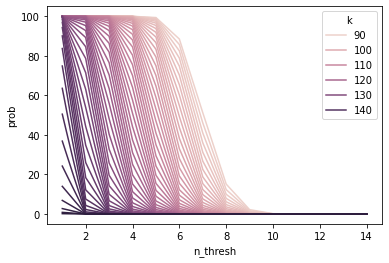

In [63]:
sns.lineplot(data=df, x='n_thresh', y='prob', hue='k')

In [24]:
poisson.sf(mu=10,k=100)

5.339405460719979e-64